**<h1 align=center><font size = 5>Classify Trees in Satellite Imagery</font></h1>**
<img src="https://eoimages.gsfc.nasa.gov/images/imagerecords/40000/40228/moorhead_tm5_2009253.jpg" width=1000 height=400 alt="esto.nasa.gov"/>

<br>

<h2>Objective</h2>

<ul>
  <li> How to download and pre-process the <b>Trees in Satellite Imagery</b> dataset.</li>
</ul> 

<p>Tree detection can be used for applications such as vegetation management, forestry, urban planning, etc. Tree identifications are very important in terms of impending famine and forest fires.</p>

<br>

<h2>About Dataset</h2>

<p>This dataset is being used for classifying the land with class of trees or not in geospatial images.</p>

Satellite: [Sentinel - 2](https://sentinel.esa.int/web/sentinel/missions/sentinel-2)

<h3>Context</h3>

<p>The content architecture is simple. Each datum has 64x64 resolution and located under <i>tree</i> and <i>notree</i> folders.
Each folder (class) has 5200 images. So the total dataset has 10.4K images.</p>

To download the dataset, you need to have a kaggle account.

 - Dataset download link: [Kaggle](https://www.kaggle.com/datasets/mcagriaksoy/trees-in-satellite-imagery/download?datasetVersionNumber=1)
 - Dataset website: [Kaggle Trees in Satellite Imagery](https://www.kaggle.com/datasets/mcagriaksoy/trees-in-satellite-imagery)

<br>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  <ul>
      <li><a href="https://#unzip_data"> Unzip data</a></li>
      <li><a href="https://#libraries"> Import Libraries and Packages </a></li>
      <li><a href="https://#image_data_generator">Construct an ImageDataGenerator Instance</a></li>
      <li><a href="https://#vis_batch_img">Visualize Batches of Images</a></li>
  </ul>

  <br>

  <p>Estimated Time Needed: <strong>190 min</strong></p>

</div>

<hr>

<br>

<h2 id="unzip_data">Unzip Data</h2>
<p>After downloading the dataset, we can unzip the file.</p>

In [1]:
!unzip -q archive.zip

<h2 id="libraries">Import Libraries and Packages</h2>

<p>Before we proceed, let's import the libraries and packages that we will need to complete the rest of this lab.</p>

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
import warnings
warnings.filterwarnings("ignore")

In [2]:
num_classes = 1  # Our classification is binary. That's why we wrote as 1.

image_resize = (224, 224) # Our images are 64 x 64 but VGG16 was originally trained on 224 × 224

batch_size_training = 100
batch_size_validation = 100
directory = "/content/Trees in Satellite Imagery"

<h2 id="data_preparation">Dataset Preparation</h2>

<p>We are going to separate our dataset as <i>7800</i> files for training and <i>2600</i> files for validation.</p>

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=image_resize,
  batch_size=batch_size_training)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  directory,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=image_resize,
  batch_size=batch_size_validation)

Found 10400 files belonging to 2 classes.
Using 7800 files for training.
Found 10400 files belonging to 2 classes.
Using 2600 files for validation.


In [4]:
valdation_batches = tf.data.experimental.cardinality(validation_dataset)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))

test_batches = valdation_batches // 5
test_dataset = validation_dataset.take(test_batches)
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 5


<h2 id="compile_fit">Compile and Fit VGG16 Model</h2>

<p>VGG16 is a convolution neural net (CNN) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. In this section, we will start building our model. We will use the Sequential model class from Keras.</p></p>

In [5]:
model_vgg16 = Sequential()

<p>Then, we will define our output layer as a <b>Dense</b> layer.</p>

In [6]:
model_vgg16.add(VGG16(include_top=False, pooling="avg", weights="imagenet"))
model_vgg16.add(Dense(num_classes, activation="softmax"))

In [7]:
model_vgg16.layers[0].trainable = False

<p>You can access the model's layers using the <i>layers</i> attribute of our model object.</p>

In [8]:
model_vgg16.layers

<p>And now using the <i>summary</i> attribute of the model.</p>

In [9]:
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


<p>Next we compile our model using the <b>adam</b> optimizer.</p>

In [10]:
model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<h2 id="train_model">Train the VGG16 Model</h2>

<p>We will need to define how many steps compose an epoch. Typically, that is the number of images divided by the batch size. Therefore, we define our steps per epoch as follows:</p>

In [11]:
num_epochs = 2
steps_per_epoch_training = len(train_dataset)
steps_per_epoch_validation = len(validation_dataset)

In [12]:
import time
start = time.time()

history = model_vgg16.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=num_epochs
)

end = time.time()

elapsed_time = end - start

print(f"Elapsed Time:{elapsed_time}s")

Epoch 1/2
78/78 [==============================] - 5327s 68s/step - loss: 0.4354 - accuracy: 0.5019 - val_loss: 0.2553 - val_accuracy: 0.4942
Epoch 2/2
78/78 [==============================] - 5280s 68s/step - loss: 0.1868 - accuracy: 0.5019 - val_loss: 0.1602 - val_accuracy: 0.4942
Elapsed Time:10664.876508712769s


In [13]:
model_vgg16.save('classifier_vgg16_model.h5')

In [18]:
# Function taken from https://www.kaggle.com/code/lucasarielsaavedra/satellite-images-classification-94-accuracy
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [19]:
num_parameters_time = {}
num_parameters_accuracy = {}
num_parameters = {}

In [20]:
num_parameters["Base"] = 14715201
num_parameters_time["Base"] = elapsed_time
num_parameters_accuracy["Base"] = history.history["val_accuracy"][-1]

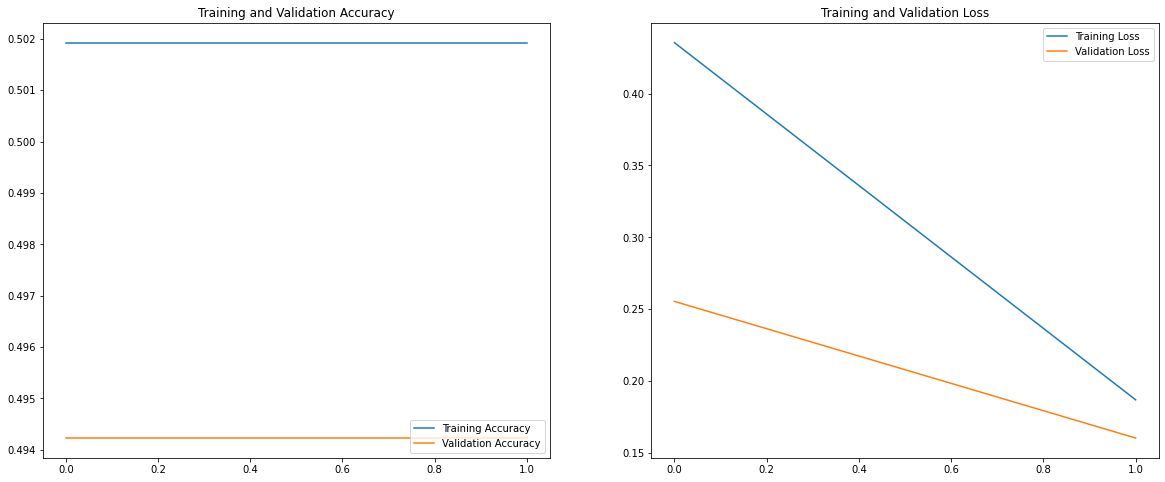

In [21]:
plot_history(history)

<hr>

<h1>Contact Me<h1>

<p>If you have something to say to me please contact me:<p>

*   Twitter: https://twitter.com/Doguilmak
*   Mail address: doguilmak@gmail.com